In [435]:
from sympy import *
init_printing()

LaTEXTextWidthInches = 6.47699

In [186]:
A  = Symbol('A', real=True, positive=True)
N  = Symbol('N', odd=True)
s = Symbol('s', real=True)
phi = Symbol('phi')

In [3]:
def lambda_n(n_num: Integer, A_num: RealNumber=A, N_num: Integer=N):
    symb = symbols('\\lambda_{{{}}}'.format(n_num).replace(' ',''))
    coef = 2*(-1)**((n_num-1)/2)/n_num/pi * (2/A_num)**n_num * binomial((N_num+n_num)/2,(N_num-n_num)/2)

    return Eq(symb,coef)

In [4]:
from matplotlib import pyplot
from numpy import arange, linspace, argmin, log as np_log, asarray, abs as np_abs
import numpy as np
from sympy import N as numeric_value_of

In [145]:
def build_potential(A_num, N_num, s_num=1.0):
    V = Integer(0)
    for k in range(1, N_num+1, 2):
        V += lambda_n(k, A_num, N_num).rhs/(k+1)**s_num * phi**(k+1)

    return V
    

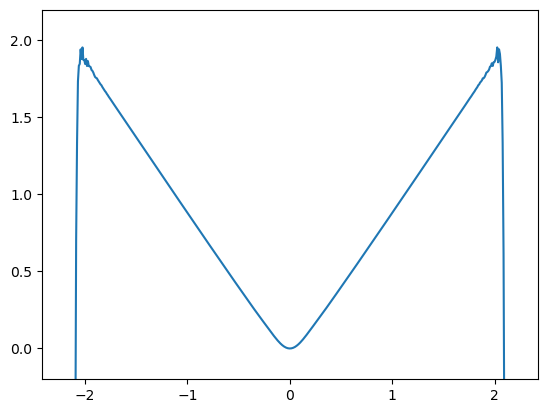

In [146]:
A_num = 2
N_num_max = 51
s_num = 2

eps = 1.1

differentiate = False

pot = build_potential(A_num, N_num_max, s_num)
y_min = -0.1*A_num
if differentiate:
    pot = pot.diff(phi)
    y_min = 10*y_min

V = lambdify(phi, pot) 
phi_num = linspace(-eps*A_num, eps*A_num, 500)

pyplot.plot(phi_num, V(phi_num))

pyplot.ylim(y_min, 1.1*A_num)

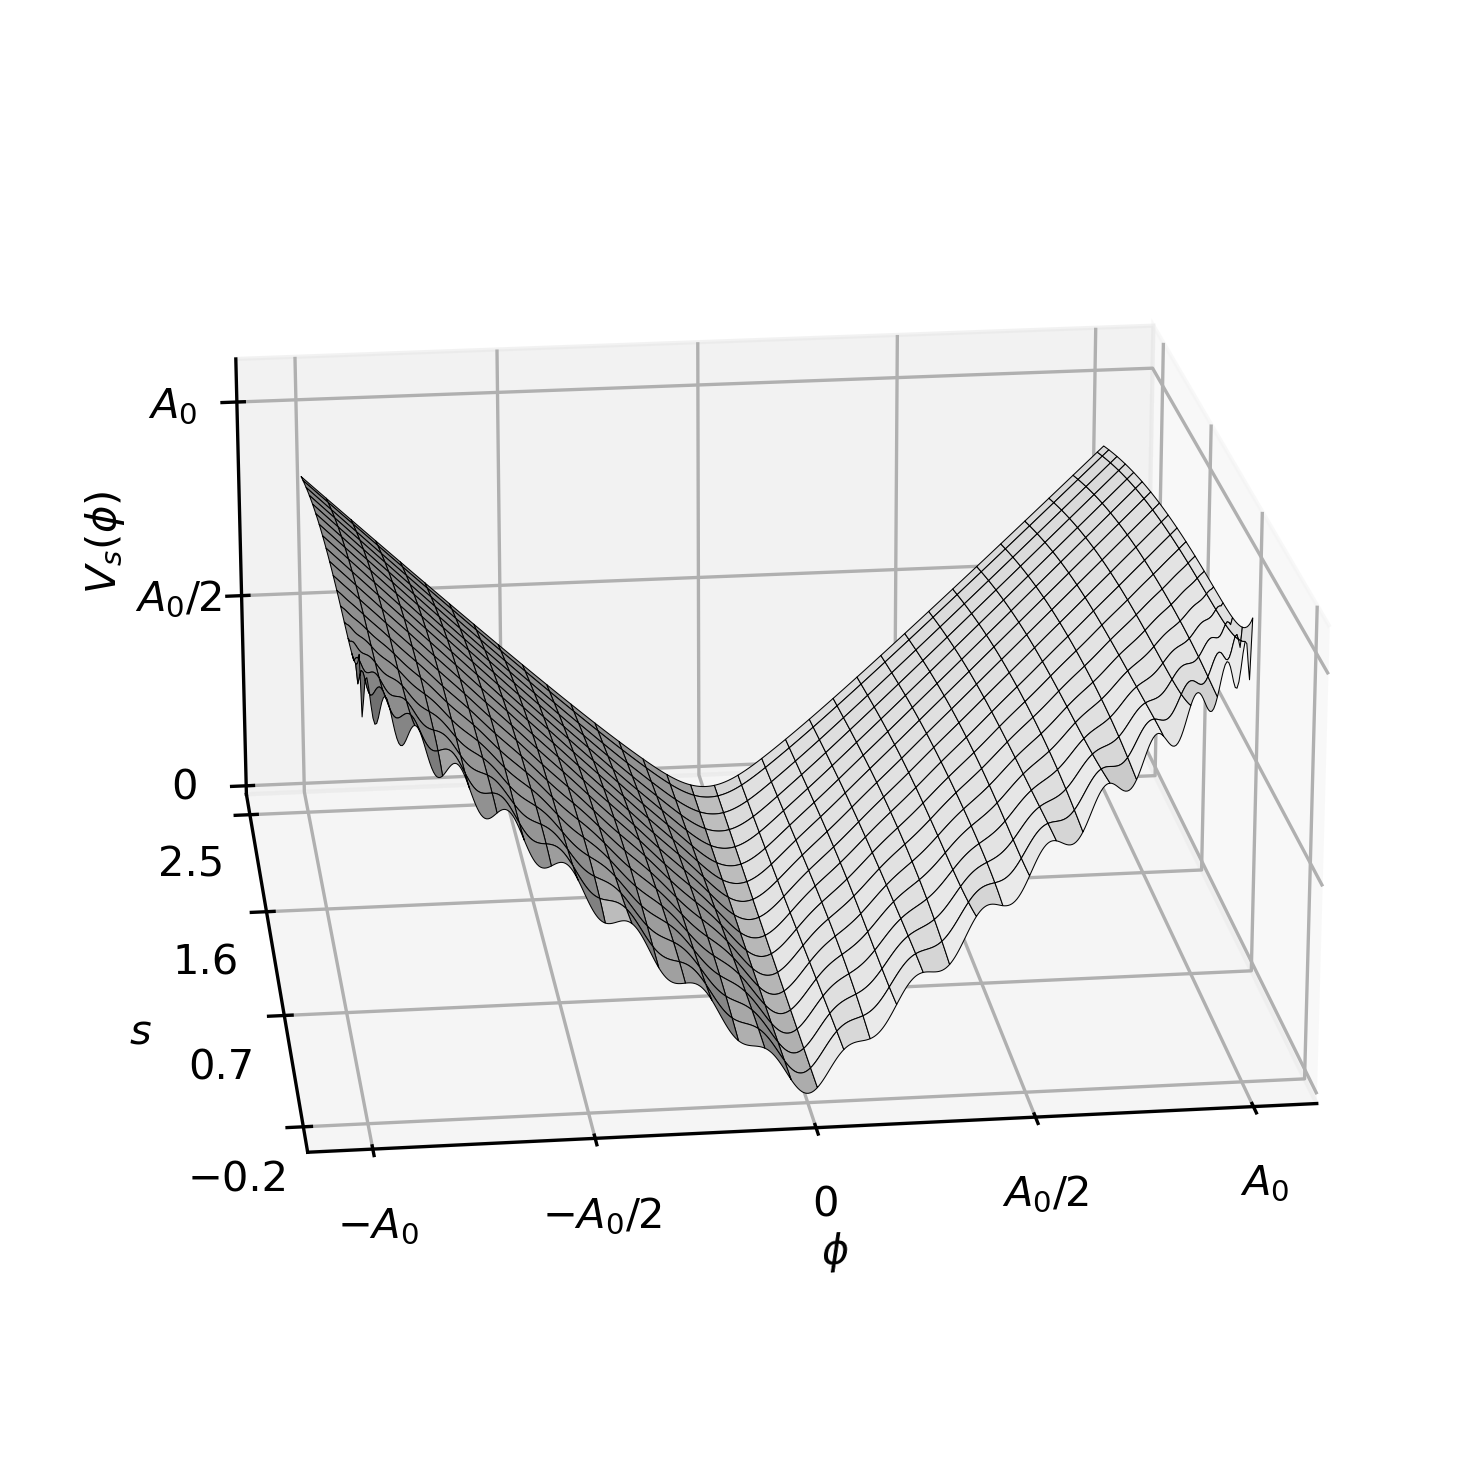

In [482]:
N_num = 37

V_local = build_potential(2, N_num, s)
V_local = lambdify((phi, s), V_local, 'numpy')

def V_func(phi, s):
    return V_local(phi, s)

import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#plt.rcParams['figure.figsize'] = [10, 10]

fig = plt.figure(figsize=(10, 5), dpi=300)
#fig = plt.figure(figsize=(18, 9), dpi=100)
ax = fig.add_subplot(111, projection='3d')

phi_count = 500
s_count = 500

m1 = 4/float(pi)

phi_num = np.linspace(-A_num, A_num, phi_count)
s_num = np.linspace(-0.2 , 2.5, s_count)

Phi, S = np.meshgrid(phi_num, s_num)
Z = V_func(Phi, S)

shaded = True
ax.plot_surface(Phi, S, Z, rstride=int(30), cstride=int(15), color='w', edgecolor=(0,0,0,1), shade=shaded, lw=0.25)

ax.set_box_aspect([2, 2, 1])

plt.tight_layout()
#ax.set_zlim(0, 5)
#ax.set_xlim(-51, 51)
ax.set_xlabel('$\\phi$', rotation=45)
ax.set_xticks((-2, -1, 0, 1, 2), ('$-A_0$', '$-A_0/2$', '$0$', '$A_0/2$', '$A_0$'))
ax.set_ylabel('$s$')
ax.set_yticks(linspace(-0.2, 2.5, 4))
ax.zaxis.set_rotate_label(False)  
ax.set_zlabel('$V_s(\\phi)$', rotation=90)
#ax.xaxis.label.set_rotation(45)
ax.set_zticks((0, 1, 2), ('$0$', '$A_0/2$', '$A_0$'))
#ax.set_zlabel("$E_{{{}}}(A,L)$".format(n_num))
ax.view_init(20,180+83)

file_name = f'/home/joao/Dropbox/Fisica/Producao/MassSignum/V_phi_x_s.png'
plt.savefig(file_name)

plt.show()

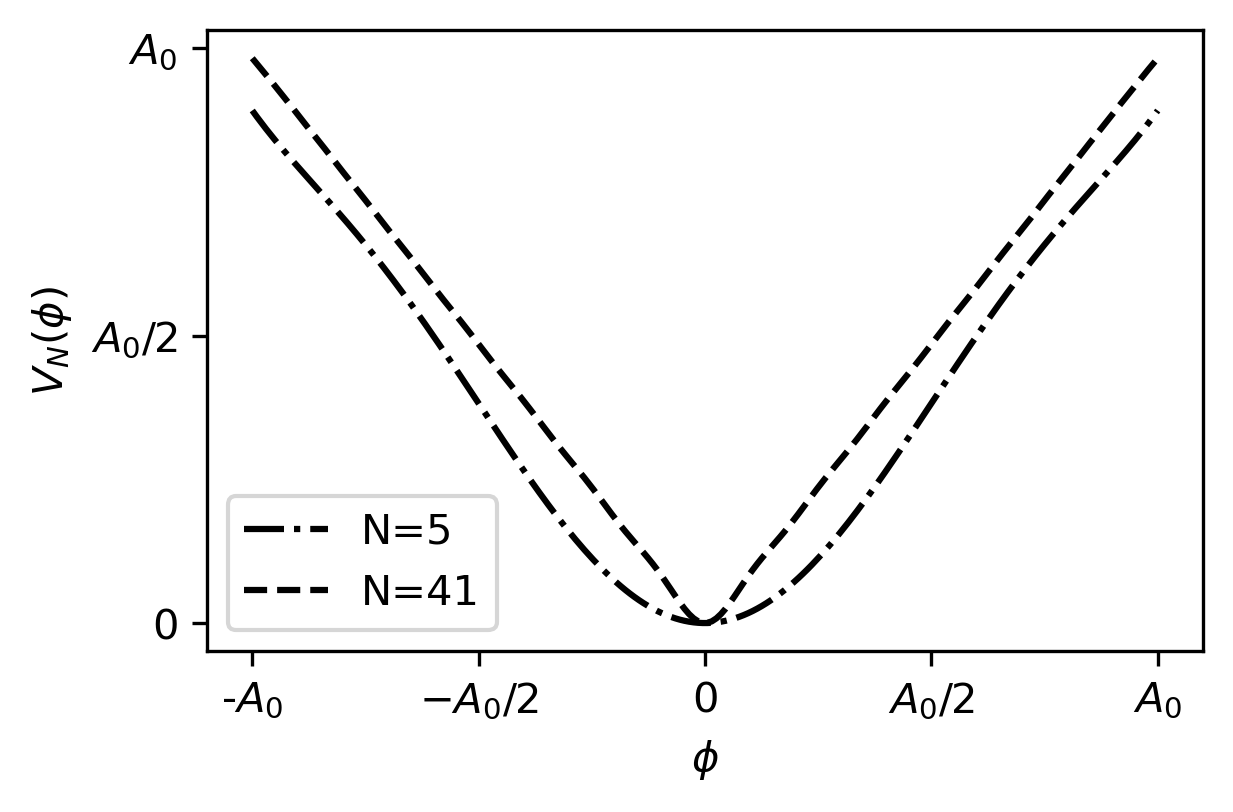

In [464]:
plt.rcParams['figure.figsize'] = [1.3*LaTEXTextWidthInches/2, 1.3*LaTEXTextWidthInches/3]
plt.rcParams['figure.dpi'] = 300

phi_vals = linspace(-2, 2, 200)
for (style, N_num) in (('-.', 5), ('--', 41)):
    V_local = lambdify(phi, build_potential(2, N_num, 1), 'numpy')                       

    pyplot.plot(phi_vals, V_local(phi_vals), label=f'N={N_num}', ls=style, color='k')

#V_original = lambdify(phi, abs(phi), 'numpy')
#pyplot.plot(phi_vals, V_original(phi_vals), label=f'$|\\phi|$', lw=1, ls=':', color='k')

pyplot.xlabel('$\\phi$')
pyplot.xticks([-2, -1, 0, 1, 2], ['-$A_0$', '$-A_0/2$', '$0$', '$A_0/2$', '$A_0$'])
pyplot.ylabel('$V_N(\\phi)$')
pyplot.yticks([0, 1, 2], ['$0$', '$A_0/2$', '$A_0$'])
pyplot.legend()

pyplot.tight_layout()

file_name = '/home/joao/Dropbox/Fisica/Producao/MassSignum/V_N.png'
pyplot.savefig(file_name)
pyplot.show()


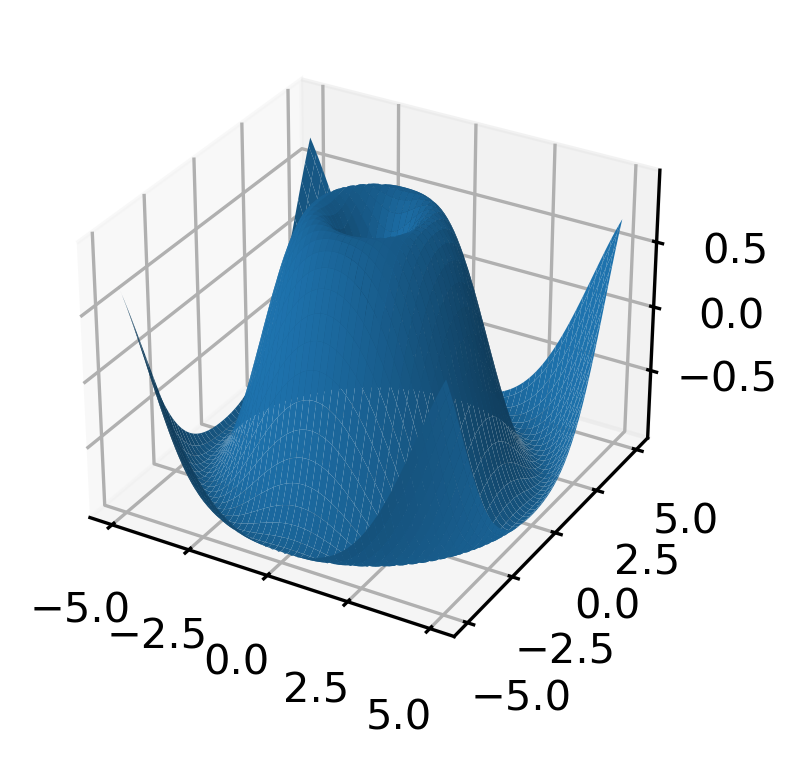

In [479]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Sample data
X = np.linspace(-5, 5, 100)
Y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(X, Y)
Z = np.sin(np.sqrt(X**2 + Y**2))

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X, Y, Z, linewidth=0.5)

# Set z-axis label with rotation
ax.set_zlabel('Z')

# Adjust z label position manually
#ax.zaxis.labelpad = 20
#ax.zaxis.set_label_coords(0.5, 1.1)

# Show plot
plt.show()
